In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import the standard tools for pythonic data analysis.
import csv
import math
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Let's read the data in as a "data frame" (df), equivalent to our D = (X,y) data matrix
def read_csv(csvfilename):
    with open(csvfilename, encoding='utf-8') as csvfile:
        rows = [row for row in csv.reader(csvfile)]
    return rows

In [ ]:
cli=pd.read_csv('/content/gdrive/MyDrive/CS3244 Team 05/Datasets/Energy/train/client_train.csv')
inv=pd.read_csv('/content/gdrive/MyDrive/CS3244 Team 05/Datasets/Energy/train/invoice_train.csv')

NameError: ignored

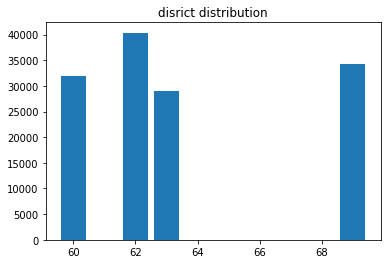

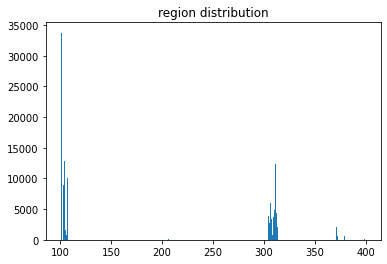

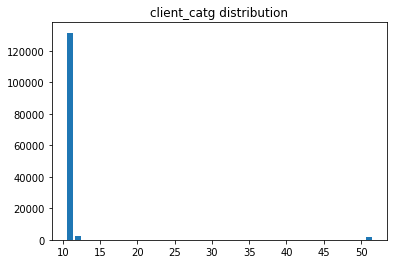

In [ ]:
for i in ['disrict','region','client_catg',]:
    ds = cli.groupby([i])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(i+' distribution')
    plt.show()

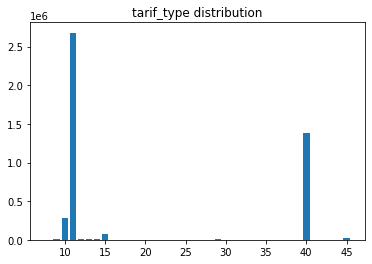

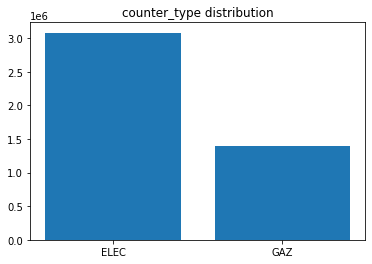

In [ ]:
for i in ['tarif_type','counter_type']:
    ds = inv.groupby([i])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(i+' distribution')
    plt.show()

In [ ]:
df=(cli.join(inv.set_index('client_id',), on='client_id')).drop(['disrict', 'client_catg','region','creation_date'], axis=1)

In [ ]:
df.head()

,client_id,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,0.0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
0,train_Client_0,0.0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
0,train_Client_0,0.0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
0,train_Client_0,0.0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
0,train_Client_0,0.0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
##df.to_csv('invoice_with_target.csv')
##!cp invoice_with_target.csv "/content/gdrive/MyDrive/CS3244 Team 05/Datasets/Energy/train/"

In [ ]:
df['target'] = pd.to_numeric(df['target'], downcast='integer')

In [ ]:
#split fraud:no fraud
df0=df[df['target']==0]

In [ ]:
df1=df[df['target']==1]

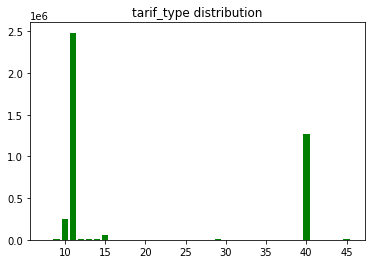

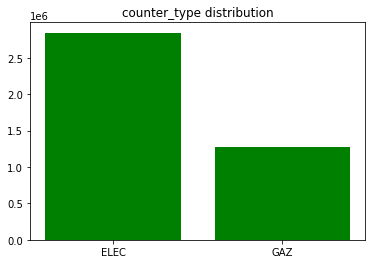

In [ ]:
#no fraud
for i in ['tarif_type','counter_type']:
    ds = df0.groupby([i])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values,color='green')
    plt.title(i+' distribution')
    plt.show()

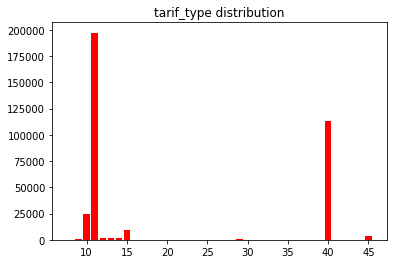

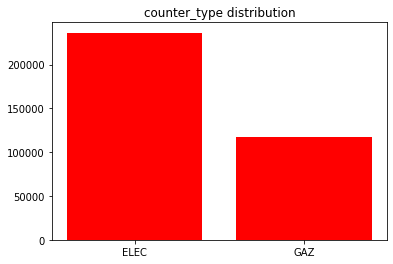

In [ ]:
#fraud
for i in ['tarif_type','counter_type']:
    ds = df1.groupby([i])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values,color='red')
    plt.title(i+' distribution')
    plt.show()

In [ ]:
fraud=df1.groupby(['client_id'], as_index=False, sort=False)['months_number'].sum()

In [ ]:
np.average(fraud['months_number'])

5419.822363203806

In [ ]:
fraud['months_number'].quantile([0.25,0.5,0.75])

0.25    128.0
0.50    168.0
0.75    264.0
Name: months_number, dtype: float64

In [ ]:
no_fraud=df0.groupby(['client_id'], as_index=False, sort=False)['months_number'].sum()

In [ ]:
np.average(no_fraud['months_number'])

1248.294097414932

In [ ]:
no_fraud['months_number'].quantile([0.25,0.5,0.75])

0.25     44.0
0.50    128.0
0.75    208.0
Name: months_number, dtype: float64